In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# AirBnB Data Analysis

In [2]:
#Loading in AirBnB data CSV
listing_data = pd.read_csv("listings.csv")
listing_df = pd.DataFrame(listing_data)
listing_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20230902023033,2023-09-02,city scrape,Serviced apartment in San Francisco · ★4.87 · ...,Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.89,4.97,4.75,City Registration Pending,f,1,1,0,0,2.36
1,5858,https://www.airbnb.com/rooms/5858,20230902023033,2023-09-02,city scrape,Rental unit in San Francisco · ★4.88 · 2 bedro...,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.64
2,8142,https://www.airbnb.com/rooms/8142,20230902023033,2023-09-02,city scrape,Rental unit in San Francisco · ★4.70 · 1 bedro...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/8e27fdaa-c207...,21994,...,4.80,4.70,4.70,NaN,f,15,0,15,0,0.09
3,8339,https://www.airbnb.com/rooms/8339,20230902023033,2023-09-02,city scrape,Condo in San Francisco · ★4.87 · 1 bedroom · 1...,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.16
4,8739,https://www.airbnb.com/rooms/8739,20230902023033,2023-09-02,city scrape,Condo in San Francisco · ★4.92 · 1 bedroom · 1...,"Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.75,STR-0000028,f,2,0,2,0,4.62


In [3]:
#Making DF of relevant info
bnbinfo_df = listing_df[["host_id","price"]]

bnbinfo_df

,host_id,price
0,1169,$187.00
1,8904,$235.00
2,21994,$56.00
3,24215,$480.00
4,7149,$122.00
...,...,...
7413,2466011,$383.00
7414,485721712,$130.00
7415,370838667,$34.00
7416,304721494,$281.00


In [4]:
#Renaming columns
bnbinfo_df = bnbinfo_df.rename(columns={"host_id":"Host ID","price":"Price per Night"})
bnbinfo_df

,Host ID,Price per Night
0,1169,$187.00
1,8904,$235.00
2,21994,$56.00
3,24215,$480.00
4,7149,$122.00
...,...,...
7413,2466011,$383.00
7414,485721712,$130.00
7415,370838667,$34.00
7416,304721494,$281.00


In [5]:
#Reminder to convert price to int/float
bnbinfo_df.dtypes

Host ID             int64
Price per Night    object
dtype: object

In [6]:
#Converting price to int and calculating price per month
bnbinfo_df["Price per Night"] = bnbinfo_df["Price per Night"].replace("[$,]", "", regex=True).astype(float)
bnbinfo_df["Price per Month"] = bnbinfo_df["Price per Night"]*30
bnbinfo_df

,Host ID,Price per Night,Price per Month
0,1169,187.0,5610.0
1,8904,235.0,7050.0
2,21994,56.0,1680.0
3,24215,480.0,14400.0
4,7149,122.0,3660.0
...,...,...,...
7413,2466011,383.0,11490.0
7414,485721712,130.0,3900.0
7415,370838667,34.0,1020.0
7416,304721494,281.0,8430.0


In [7]:
#Checking data types one more time
bnbinfo_df.dtypes

Host ID              int64
Price per Night    float64
Price per Month    float64
dtype: object

In [8]:
#Binning AirBNB Data
bins = [0,499.99, 999.99, 1499.99, 1999.99, 2499.99, 2999.99, 15000.00]
group_names = ["Less than $500","$500 to 999", "$1,000 to 1,499", "$1,500 to 1,999", "$2,000 to 2,499", "$2,500 to 2,999",
              "$3,000 or more"]
bnbinfo_df["Groups"] = pd.cut(bnbinfo_df["Price per Month"], bins, labels=group_names, include_lowest=True)
bnbinfo_df

,Host ID,Price per Night,Price per Month,Groups
0,1169,187.0,5610.0,"$3,000 or more"
1,8904,235.0,7050.0,"$3,000 or more"
2,21994,56.0,1680.0,"$1,500 to 1,999"
3,24215,480.0,14400.0,"$3,000 or more"
4,7149,122.0,3660.0,"$3,000 or more"
...,...,...,...,...
7413,2466011,383.0,11490.0,"$3,000 or more"
7414,485721712,130.0,3900.0,"$3,000 or more"
7415,370838667,34.0,1020.0,"$1,000 to 1,499"
7416,304721494,281.0,8430.0,"$3,000 or more"


In [9]:
#Counting price groups
price_groups_count = bnbinfo_df["Groups"].value_counts()
price_groups_count.head()

Groups
$3,000 or more     5079
$2,500 to 2,999     637
$2,000 to 2,499     475
$1,500 to 1,999     469
$1,000 to 1,499     171
Name: count, dtype: int64

In [10]:
#Making groupby object
price_groups = bnbinfo_df.groupby(["Groups"])
print(price_groups)
price_groups.count()

,Host ID,Price per Night,Price per Month
Groups,,,
Less than $500,0,0,0
$500 to 999,14,14,14
"$1,000 to 1,499",171,171,171
"$1,500 to 1,999",469,469,469
"$2,000 to 2,499",475,475,475
"$2,500 to 2,999",637,637,637
"$3,000 or more",5079,5079,5079


In [11]:
#Creating variable to find percentage of AirBnBs
total_bnb = (bnbinfo_df["Host ID"].count())
total_bnb

7418

In [12]:
#Adding percentages column to DataFrame
price_groups_df = pd.DataFrame(price_groups[["Price per Month"]].count())

price_groups_df = price_groups_df.rename(columns={'Price per Month': '# of AirBnBs'})
price_groups_df["% of AirBnBs"] = (price_groups_df["# of AirBnBs"] / total_bnb.sum()) * 100

price_groups_df

,# of AirBnBs,% of AirBnBs
Groups,,
Less than $500,0,0.000000
$500 to 999,14,0.188730
"$1,000 to 1,499",171,2.305204
"$1,500 to 1,999",469,6.322459
"$2,000 to 2,499",475,6.403343
"$2,500 to 2,999",637,8.587220
"$3,000 or more",5079,68.468590


In [13]:
#Reducing AirBnB dataframe to solely percentages for graphing
percent_bnb = price_groups_df[["% of AirBnBs"]]
percent_bnb

,% of AirBnBs
Groups,
Less than $500,0.000000
$500 to 999,0.188730
"$1,000 to 1,499",2.305204
"$1,500 to 1,999",6.322459
"$2,000 to 2,499",6.403343
"$2,500 to 2,999",8.587220
"$3,000 or more",68.468590


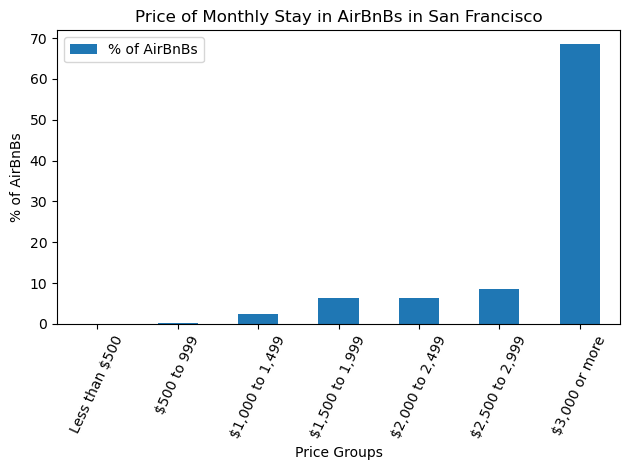

In [26]:
#Graphing AirBnB data
bnb_graph = percent_bnb.plot(kind="bar", title="Price of Monthly Stay in AirBnBs in San Francisco", rot=65)
plt.ylabel("% of AirBnBs")
plt.xlabel("Price Groups")
plt.tight_layout()
plt.savefig("monthly_airbnb.png")

# Census Data Analysis

In [16]:
#Loading Census data csv
census_data = pd.read_csv("census_data.csv")
census_df = pd.DataFrame(census_data)
census_df

,Label (Grouping),"San Francisco-Oakland-Berkeley, CA Metro Area!!Estimate","San Francisco-Oakland-Berkeley, CA Metro Area!!Margin of Error","San Francisco-Oakland-Berkeley, CA Metro Area!!Percent","San Francisco-Oakland-Berkeley, CA Metro Area!!Percent Margin of Error"
0,HOUSING OCCUPANCY,NaN,NaN,NaN,NaN
1,Total housing units,"1,837,144","±1,170","1,837,144",(X)
2,Occupied housing units,"1,716,654","±4,203",93.4%,±0.2
3,Vacant housing units,"120,490","±3,705",6.6%,±0.2
4,Homeowner vacancy rate,0.7,±0.1,(X),(X)
...,...,...,...,...,...
155,20.0 to 24.9 percent,"98,368","±2,521",13.3%,±0.3
156,25.0 to 29.9 percent,"83,857","±2,292",11.4%,±0.3
157,30.0 to 34.9 percent,"62,386","±2,292",8.5%,±0.3
158,35.0 percent or more,"277,537","±3,963",37.6%,±0.5


In [17]:
#Grabbing relevant data out of Census CSV
census_df = census_df.iloc[142:149]
census_df

,Label (Grouping),"San Francisco-Oakland-Berkeley, CA Metro Area!!Estimate","San Francisco-Oakland-Berkeley, CA Metro Area!!Margin of Error","San Francisco-Oakland-Berkeley, CA Metro Area!!Percent","San Francisco-Oakland-Berkeley, CA Metro Area!!Percent Margin of Error"
142,Less than $500,"41,647","±1,873",5.6%,±0.2
143,$500 to $999,"52,397","±1,663",7.0%,±0.2
144,"$1,000 to $1,499","98,387","±2,583",13.2%,±0.3
145,"$1,500 to $1,999","137,098","±3,113",18.3%,±0.4
146,"$2,000 to $2,499","143,406","±2,710",19.2%,±0.4
147,"$2,500 to $2,999","104,375","±2,738",14.0%,±0.4
148,"$3,000 or more","170,855","±3,163",22.8%,±0.4


In [18]:
#Grabbing relevant columns out of Census DataFrame
census_df = census_df[["Label (Grouping)", "San Francisco-Oakland-Berkeley, CA Metro Area!!Percent"]]
census_df

,Label (Grouping),"San Francisco-Oakland-Berkeley, CA Metro Area!!Percent"
142,Less than $500,5.6%
143,$500 to $999,7.0%
144,"$1,000 to $1,499",13.2%
145,"$1,500 to $1,999",18.3%
146,"$2,000 to $2,499",19.2%
147,"$2,500 to $2,999",14.0%
148,"$3,000 or more",22.8%


In [19]:
#Renaming Census Dataframe columns
census_df = census_df.rename(columns={"Label (Grouping)":"Groups", 
                                      "San Francisco-Oakland-Berkeley, CA Metro Area!!Percent": "% of People"})

census_df = census_df.set_index("Groups")
census_df

,% of People
Groups,
Less than $500,5.6%
$500 to $999,7.0%
"$1,000 to $1,499",13.2%
"$1,500 to $1,999",18.3%
"$2,000 to $2,499",19.2%
"$2,500 to $2,999",14.0%
"$3,000 or more",22.8%


In [20]:
#Removing percent signs and converting number to int
census_df['% of People'] = census_df['% of People'].replace("[%]", "", regex=True).astype(float)
census_df

,% of People
Groups,
Less than $500,5.6
$500 to $999,7.0
"$1,000 to $1,499",13.2
"$1,500 to $1,999",18.3
"$2,000 to $2,499",19.2
"$2,500 to $2,999",14.0
"$3,000 or more",22.8


In [21]:
#Fixing formatting in Census Dataframe index
census_df = census_df.rename(index={'        Less than $500': 'Less than $500',
                    '        $500 to $999': '$500 to 999',
                    '        $1,000 to $1,499': '$1,000 to 1,499',
                   '        $1,500 to $1,999': '$1,500 to 1,999',
                   '        $2,000 to $2,499': '$2,000 to 2,499',
                   '        $2,500 to $2,999': '$2,500 to 2,999',
                   '        $3,000 or more': '$3,000 or more'})
census_df

,% of People
Groups,
Less than $500,5.6
$500 to 999,7.0
"$1,000 to 1,499",13.2
"$1,500 to 1,999",18.3
"$2,000 to 2,499",19.2
"$2,500 to 2,999",14.0
"$3,000 or more",22.8


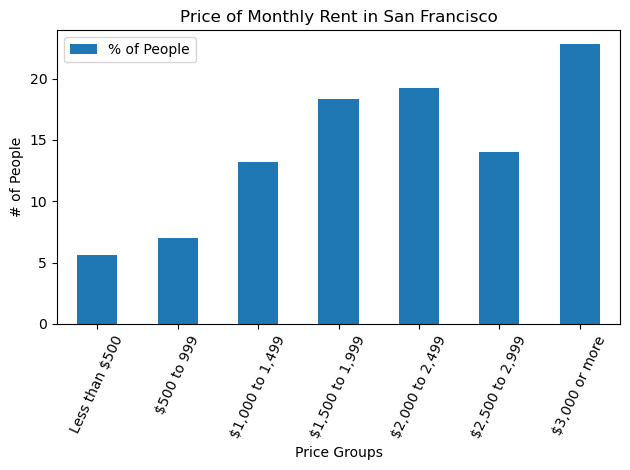

In [23]:
#Graphing Census Data
rent_graph = census_df.plot(kind="bar", title="Price of Monthly Rent in San Francisco", rot=65)
plt.ylabel("# of People")
plt.xlabel("Price Groups")
plt.tight_layout()
plt.savefig("sanfran_rent.png")

# Merging both DataFrames to make one graph for easier visual comparison of data

In [24]:
#Merging AirBnB and Census dataframes
merged_df = pd.merge(census_df,percent_bnb, left_index=True, right_index=True)
merged_df

,% of People,% of AirBnBs
Groups,,
Less than $500,5.6,0.000000
$500 to 999,7.0,0.188730
"$1,000 to 1,499",13.2,2.305204
"$1,500 to 1,999",18.3,6.322459
"$2,000 to 2,499",19.2,6.403343
"$2,500 to 2,999",14.0,8.587220
"$3,000 or more",22.8,68.468590


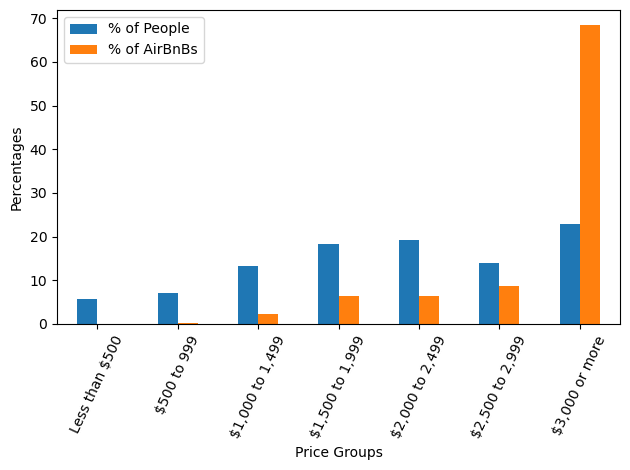

In [25]:
merged_graph =  merged_df.plot(kind="bar", rot=65)
plt.xlabel("Price Groups")
plt.ylabel("Percentages")
plt.tight_layout()
plt.savefig("comparison_graph.png")